# Pymaceuticals
* Explore pharmaceutical drugs and their success rates
* Matthew Richtmyer | Dec 21, 2019

In [185]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load,header=0)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load,header=0)

# Combine the data into a single dataset
df = mouse_drug_data.merge(clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
df.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [186]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = df.groupby(["Drug","Timepoint"]).mean().reset_index()
mean_tumor_volume = mean_tumor_volume.drop(columns=["Metastatic Sites"], axis=1)
mean_tumor_volume.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [187]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = df.groupby(["Drug","Timepoint"]).sem().reset_index()
sem_tumor_volume = sem_tumor_volume.drop(columns=["Mouse ID","Metastatic Sites"],axis=1)
sem_tumor_volume.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [188]:
# Pivot table
mean_tumor_volume = mean_tumor_volume.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")
mean_tumor_volume.head(20)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [189]:
sem_tumor_volume = sem_tumor_volume.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
sem_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


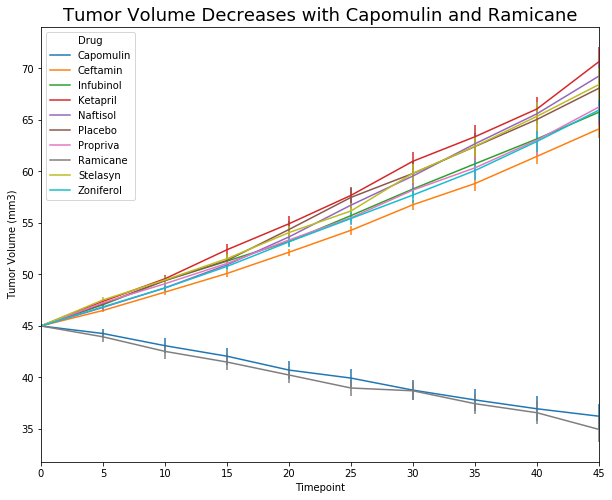

In [190]:
# Generate the Plot (with Error Bars)
mean_tumor_volume.plot(kind="line",yerr=sem_tumor_volume,legend=True,figsize=(10,8))
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Decreases with Capomulin and Ramicane", fontsize=18)
plt.savefig("Tumor Volume over Time.png")

## Metastatic Response to Treatment

In [191]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = df.groupby(["Drug","Timepoint"]).mean().reset_index()
mean_metastatic = mean_metastatic.drop(["Tumor Volume (mm3)"],axis=1)
mean_metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [192]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic = df.groupby(["Drug","Timepoint"]).sem().reset_index()
sem_metastatic = sem_metastatic.drop(["Tumor Volume (mm3)","Mouse ID"],axis=1)
sem_metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [193]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic = mean_metastatic.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")
mean_metastatic.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [194]:
sem_metastatic = sem_metastatic.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
sem_metastatic.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


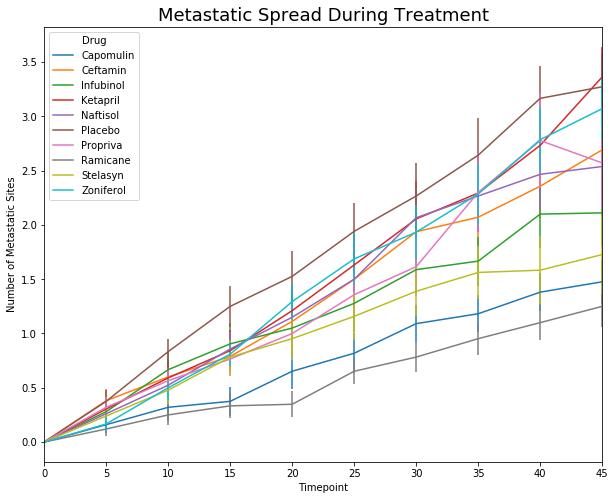

In [196]:
mean_metastatic.plot(kind="line",yerr=sem_metastatic,legend=True,figsize=(10,8))
plt.ylabel("Number of Metastatic Sites")
plt.title("Metastatic Spread During Treatment", fontsize=18)
plt.savefig("Metastatic Spread During Treatment.png")

## Survival Rates

In [197]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df = mouse_drug_data.merge(clinical_trial_data, on="Mouse ID", how="outer")
survival = df.groupby(["Drug","Timepoint"]).count().reset_index()
survival = survival.drop(["Tumor Volume (mm3)", "Metastatic Sites"], axis=1)
survival.columns = ["Drug", "Timepoint", "Mouse Count"]
survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [198]:
# Minor Data Munging to Re-Format the Data Frames
survival = survival.pivot(index="Timepoint",columns="Drug",values="Mouse Count")

survival = survival/25*100
survival["Stelasyn"] = survival["Stelasyn"]*25/26
survival["Propriva"] = survival["Propriva"]*25/26
survival.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


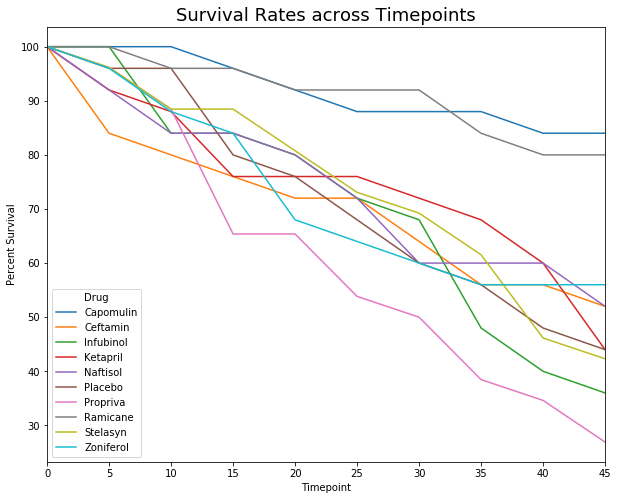

In [199]:
# Generate the Plot (Accounting for percentages)
survival.plot(kind="line",legend=True,figsize=(10,8))
plt.ylabel("Percent Survival")
plt.title("Survival Rates across Timepoints",fontsize=18)
# Save the Figure
plt.savefig("Survival Rates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [200]:
# Calculate the percent changes for each drug

# Display the data to confirm
mean_tumor_volume.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [201]:
pct_change_df = mean_tumor_volume.pct_change(periods=9)
pct_change = pct_change_df.iloc[-1:]


In [202]:
pct_change = pct_change.transpose()
pct_change = pct_change * 100 # convert to percentage
pct_change

Timepoint,45
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [166]:
pct_change[45]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [306]:
pct_change.index


Index(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Zoniferol',
       'Propriva', 'Placebo', 'Stelasyn', 'Naftisol', 'Ketapril'],
      dtype='object', name='Drug')

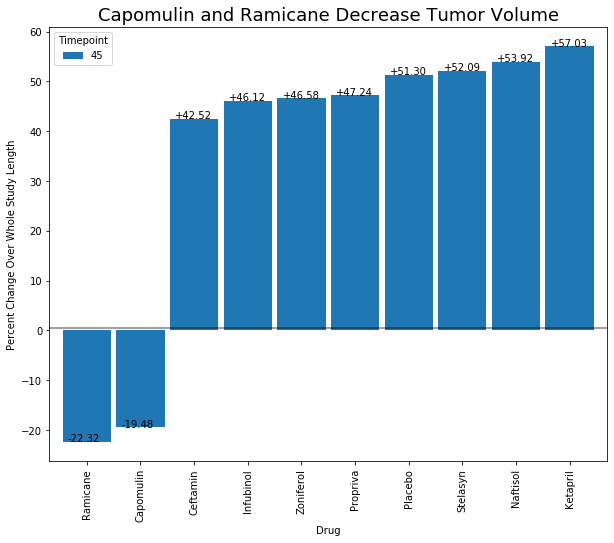

In [320]:
# Store all Relevant Percent Changes into a Tuple
pct_change = pct_change.sort_values(by=[45],ascending=True)

ax = pct_change.plot(kind="bar",legend=True,figsize=(10,8),width=0.9)
#ax = plt.bar(pct_change.index,pct_change[45].values,width=0.9,color=colors)
plt.xticks(rotation='vertical')

plt.ylabel("Percent Change Over Whole Study Length")
plt.title("Capomulin and Ramicane Decrease Tumor Volume",fontsize=18)

plt.axhline(y=0.5, color='k', linestyle='-',alpha=0.5)


# nifty way to annotate graph with positive and negative values. tweak offset parameters to look good
# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
x_offset = -0.35
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))



plt.savefig("Percent Change.png")

## Second Assignment

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = mouse_metadata.merge(study_results, on="Mouse ID", how="outer")

In [295]:
df.sort_values(by="Drug Regimen").head(10) # this dataset is different because it has the "Sex" column called out
                                           # will probably have to find trends w/r/t/ gender

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
333,j119,Capomulin,Female,7,23,25,42.417166,1
296,b742,Capomulin,Male,7,21,30,39.167949,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
290,b742,Capomulin,Male,7,21,0,45.000000,0
282,l897,Capomulin,Male,17,19,45,38.846876,1
281,l897,Capomulin,Male,17,19,40,38.343902,1


## Summary Table
* Groupby aggregate method .describe() shows mean, std, max, min and counts for each drug and gender

In [215]:
gb = df.groupby(["Drug Regimen","Sex"]).describe().reset_index()
gb

Drug Regimen     Sex Age_months                                        \
                             count       mean       std  min   25%   50%   
0     Capomulin  Female      128.0  11.625000  8.262428  1.0   3.0   9.0   
1     Capomulin    Male      102.0  15.754902  6.304856  3.0  12.0  17.0   
2      Ceftamin  Female       92.0  12.032609  6.940012  3.0   6.0  11.0   
3      Ceftamin    Male       86.0  14.546512  8.988433  2.0   5.0  18.0   
4     Infubinol  Female       95.0  17.157895  7.131464  1.0  17.0  20.0   
5     Infubinol    Male       83.0  15.168675  7.830240  3.0   8.0  18.0   
6      Ketapril  Female       58.0  11.000000  7.006263  1.0   4.0  11.0   
7      Ketapril    Male      130.0  17.738462  4.089225  8.0  15.5  18.0   
8      Naftisol  Female       86.0  10.906977  6.952998  2.0   2.0  12.0   
9      Naftisol    Male      100.0  12.940000  6.390997  4.0   8.0   9.0   
10      Placebo  Female      102.0  12.107843  6.735317  2.0   4.5  13.0   
11      Placebo    Male       79.0   8.962025  5.367144  1.0   5.0   7.0   
12     Propriva  Female       74.0   9.378378  7.107208  2.0   4.0   5.5   
13     Propriva    Male       87.0  12.183908  7.261765  1.0   7.0   8.0   
14     Ramicane  Female       74.0   9.729730  5.786847  4.0   5.5   8.0   
15     Ramicane    Male      154.0  11.142857  5.986290  1.0   8.0  10.0   
16     Stelasyn  Female      107.0  10.317757  7.706403  1.0   3.0   8.0   
17     Stelasyn    Male       74.0  16.351351  6.883437  3.0   9.5  20.0   
18    Zoniferol  Female      119.0  11.647059  5.677174  2.0   8.0  11.0   
19    Zoniferol    Male       63.0  14.396825  5.601093  5.0  12.0  14.0   

                 ... Tumor Volume (mm3)            Metastatic Sites            \
      75%   max  ...                75%        max            count      mean   
0   20.00  23.0  ...          45.000000  48.158209            128.0  0.648438   
1   22.00  24.0  ...          45.000000  48.070452            102.0  0.794118   
2   19.00  24.0  ...          56.986935  68.594745             92.0  1.086957   
3   24.00  24.0  ...          56.789215  68.923185             86.0  1.279070   
4   23.00  24.0  ...          58.881020  67.973419             95.0  1.368421   
5   23.00  24.0  ...          55.650760  72.226731             83.0  0.493976   
6   18.00  22.0  ...          58.470893  71.905117             58.0  0.913793   
7   21.00  24.0  ...          61.862841  78.567014            130.0  1.469231   
8   18.00  23.0  ...          60.344834  76.668817             86.0  1.186047   
9   20.25  23.0  ...          59.370377  73.867845            100.0  1.180000   
10  17.75  21.0  ...          60.411905  73.059454            102.0  1.607843   
11  12.00  19.0  ...          58.056160  73.212939             79.0  1.227848   
12  12.00  24.0  ...          57.416380  72.455421             74.0  0.824324   
13  21.00  22.0  ...          55.797746  70.492788             87.0  1.103448   
14  10.00  23.0  ...          45.000000  46.910892             74.0  0.513514   
15  18.00  21.0  ...          44.916149  47.622816            154.0  0.564935   
16  16.00  23.0  ...          61.026741  75.123690            107.0  1.018692   
17  21.00  23.0  ...          56.828293  69.038876             74.0  0.662162   
18  16.00  20.0  ...          59.409697  73.324432            119.0  1.310924   
19  15.00  24.0  ...          55.714124  70.827796             63.0  1.079365   

                                       
         std  min  25%  50%  75%  max  
0   0.837975  0.0  0.0  0.0  1.0  3.0  
1   0.859867  0.0  0.0  1.0  1.0  3.0  
2   1.219369  0.0  0.0  1.0  2.0  4.0  
3   1.144307  0.0  0.0  1.0  2.0  4.0  
4   1.101765  0.0  0.5  1.0  2.0  4.0  
5   0.687404  0.0  0.0  0.0  1.0  3.0  
6   1.442275  0.0  0.0  0.0  1.0  4.0  
7   1.342152  0.0  0.0  1.0  2.0  4.0  
8   1.142872  0.0  0.0  1.0  2.0  4.0  
9   1.282201  0.0  0.0  1.0  2.0  4.0  
10  1.456680  0.0  0.0  1.0  3.0  4.0  
11  1.142976  0.0  0.0  1.0

In [ ]:
# group male and female population seperately for convenience calling the df.plot commands with legend

In [266]:
males = gb.loc[ gb["Sex"] == "Male", :]
females = gb.loc[ gb["Sex"] == "Female", :]

## Show Number of Datapoints
### Using dataframe.plot

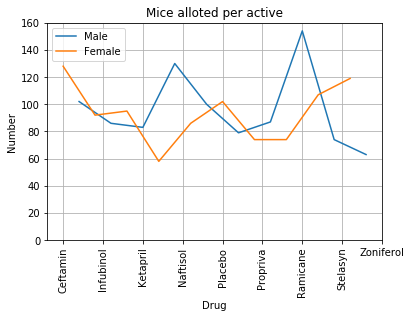

In [294]:
#gb["Age_months", "count"].plot(kind="line")
f, ax = plt.subplots()
males["Age_months","count"].plot(kind="line")
females["Age_months","count"].plot(kind="line")
ax.set_xticklabels(males["Drug Regimen"].values)
plt.xticks(rotation="vertical")
plt.xlim((-1,20))
plt.ylim((0,160))
plt.title("Mice alloted per active")
plt.xlabel("Drug")
plt.ylabel("Number")
plt.legend(["Male","Female"])
plt.grid()

### Using pyplot.plot

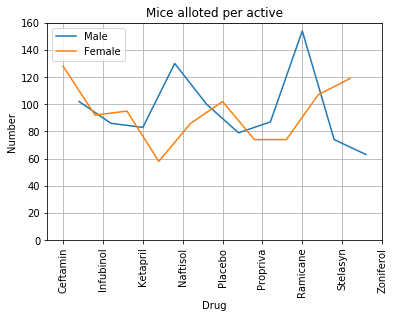

In [293]:
f, ax = plt.subplots()
x = np.arange(1,11)

plt.plot(males["Age_months","count"])
ax.set_xticklabels(males["Drug Regimen"].values)
plt.xticks(rotation="vertical")
#plt.xticks(x, males["Drug Regimen"].values, rotation='vertical')
plt.plot(females["Age_months","count"])
plt.xlim((-1,20))
plt.ylim((0,160))
plt.title("Mice alloted per active")
plt.xlabel("Drug")
plt.ylabel("Number")
plt.legend(["Male","Female"])
plt.grid()